In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector 
from mysql.connector import Error

In [3]:


def create_server_connection(host_name, user_name, user_password,database):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=database
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection


# Function to exec query
def execute_query(connection, query):
    cursor = connection.cursor(buffered=True)
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")


# Test Connection
host_name='localhost'
user_name='hdi'
user_password='hdi'
database='sustainable_development'
connection = create_server_connection(host_name=host_name,user_name=user_name,user_password=user_password,database=database)



MySQL Database connection successful


In [4]:
query ='select * from inputs;'
result= pd.read_sql_query(sql=query,con=connection)

In [5]:
# Carbon Dioxide Emission per Capital Distribution 
# sql = 'select Country as country,`Carbon dioxide emissions per capita (production)_(tonnes)_2020` as cde from hdi_revised order by cde desc;'

import queries as hdi_queries
sql='select onu, `Carbon dioxide emissions per capita (production)_(tonnes)_2020` as cde from hdi_revised order by hdi_rank'
connection = create_server_connection()
result_set= pd.read_sql_query(sql=hdi_queries.ranking_per_cdei_query,con=connection)

x_list = result_set[['hdi_rank']].values
y_list = result_set[['cde']].values


plt.scatter(x_list, y_list)
plt.title("Carbon Dioxide Emission")
plt.xlabel("country ranking")
plt.ylabel("emission")
plt.show()



TypeError: create_server_connection() missing 4 required positional arguments: 'host_name', 'user_name', 'user_password', and 'database'

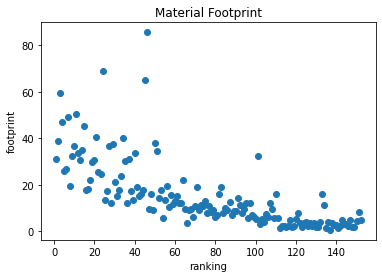

In [ ]:
# Material Footprint Distribution per Capital Distribution

sql='select hdi_rank, material_footprint from hdi_revised order by hdi_rank'
result_set= pd.read_sql_query(sql=sql,con=connection)

x_list = result_set[['hdi_rank']].values
y_list = result_set[['material_footprint']].values


plt.scatter(x_list, y_list)
plt.title("Material Footprint")
plt.xlabel("ranking")
plt.ylabel("footprint")
plt.show()



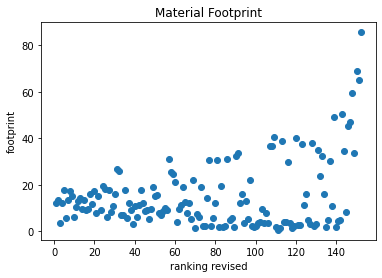

In [ ]:
sql='select hdi_rank_revised, material_footprint from hdi_revised order by hdi_rank_revised'
result_set= pd.read_sql_query(sql=sql,con=connection)

x_list = result_set[['hdi_rank_revised']].values
y_list = result_set[['material_footprint']].values


plt.scatter(x_list, y_list)
plt.title("Material Footprint")
plt.xlabel("ranking revised")
plt.ylabel("footprint")
plt.show()

In [ ]:
import queries as hdi_queries

connection = create_server_connection()
result_set= pd.read_sql_query(sql=hdi_queries.ranking_per_cdei_query,con=connection)

x_list = result_set[['revied_ranking']].values
y_list = result_set[['carbon_dioxide_emission']].values


plt.scatter(x_list, y_list)
plt.title("Carbon Dioxide Emission")
plt.xlabel("country ranking")
plt.ylabel("emission")
plt.show()

NameError: name 'create_server_connection' is not defined